In [1]:
import pandas as pd

training_data = pd.read_csv('train_data.csv')
testing_data = pd.read_csv('test_data.csv')

In [2]:
# Splitting data
X_train = training_data.drop(columns=['sellingprice'])
y_train =  training_data['sellingprice']

X_test = testing_data.drop(columns=['sellingprice'])
y_test = testing_data['sellingprice']

In [3]:
# Standarisasi Features
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform (X_test)

In [4]:
# Fitting SVR to the Training Set
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [5]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Eval Train
y_pred_train = svr.predict(X_train)
print('Train Score')
print("MAE: %.2f" % mean_absolute_error(y_pred_train, y_train)) # The MAE
print("RMSE: %.2f" % mean_squared_error(y_pred_train, y_train, squared=False)) # The RMSE
print('R2 score: %.2f' % r2_score(y_pred_train, y_train)) # Explained variance score: 1 is perfect prediction
print('='*75)

# Eval Test
y_pred_test = svr.predict(X_test)
print('Test Score')
print("MAE: %.2f" % mean_absolute_error(y_pred_test, y_test)) # The MAE
print("RMSE: %.2f" % mean_squared_error(y_pred_test, y_test, squared=False)) # The RMSE
print('R2 score: %.2f' % r2_score(y_pred_test, y_test)) # Explained variance score: 1 is perfect prediction

Train Score
MAE: 3938.99
RMSE: 5521.72
R2 score: -7.44
Test Score
MAE: 3908.13
RMSE: 5472.84
R2 score: -7.26


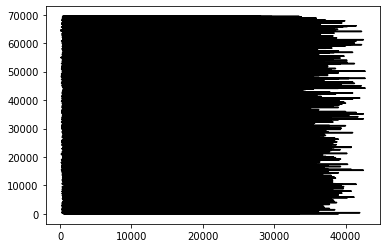

In [19]:
# plotting
import numpy as np
import matplotlib.pyplot as plt
length = np.linspace(0, len(y_test), len(y_test))
plt.plot(y_test.values, length, '-k', label='orginal')
plt.show()

In [20]:
df_compared = pd.DataFrame({
    'sellingprice_original': y_test,
    'sellingprice_predicted': y_pred_test
})

df_compared['sellingprice_predicted'] = round(df_compared['sellingprice_predicted'], 2)

In [21]:
# minus artinya prediksi harga mobil di bawah harga asli (kita rugi)
# positif artinya prediksi harga mobil di atas harga asli (customer akan mikir dua kali utk menjual mobilnya)
df_compared['diff'] = round(df_compared['sellingprice_predicted'] - df_compared['sellingprice_original'], 2)
df_compared

,sellingprice_original,sellingprice_predicted,diff
0,6200,8977.23,2777.23
1,2500,8584.72,6084.72
2,8600,11559.19,2959.19
3,14200,12884.50,-1315.50
4,18000,13544.48,-4455.52
...,...,...,...
69439,6900,9703.08,2803.08
69440,9200,10400.77,1200.77
69441,2800,10630.28,7830.28
69442,600,10197.59,9597.59


In [22]:
df_compared.to_csv('result_SVR.csv', index=False)